# 1. Import 

In [68]:
import os
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


# 2. function read images from the folder

In [69]:
def read_imgs(name, output, output_index, path = "train"):
    path = f"{path}\{name}"
    imgs = os.listdir(path)    
    x = [None]* len(imgs)
    for i, img in enumerate(imgs):
        img  = imread(os.path.join(path, img))
        img = resize(img, (128, 64, 3))
        x[i], _ = hog(img, multichannel=True, orientations = 9, 
                                pixels_per_cell = (8, 8), cells_per_block = (2, 2),
                                visualize=True) 
        output[output_index] = name
        output_index +=1
    return (x, output, output_index)

# 3. perprossing the traning data

In [70]:
output = [None] * 57
output_index = 0
accordian_fd, output, output_index = read_imgs(
    "accordian", output, output_index)
dollar_bill_fd, output, output_index = read_imgs(
    "dollar_bill", output, output_index)
motorbike_fd, output, output_index = read_imgs(
    "motorbike", output, output_index)
soccer_ball_fd, output, output_index = read_imgs(
    "Soccer_Ball", output, output_index)
lists = accordian_fd + dollar_bill_fd+motorbike_fd+soccer_ball_fd
print(len(lists[0]))
print(lists[0])

3780
[0. 0. 0. ... 0. 0. 0.]


In [71]:
input_np = np.array(lists).reshape(-1, len(lists[0]))
output
print("(imgs, array of each img)")
print(input_np.shape)
print(f"the output shape is : {len(output)}")

(imgs, array of each img)
(57, 3780)
the output shape is : 57


# 4. Model traning

In [72]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=10, verbose=3)
grid_search.fit(input_np, output)


Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 2/10] END .............C=0.1, kernel=linear;, score=0.833 total time=   0.0s
[CV 3/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 4/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 7/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 8/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 9/10] END .............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 10/10] END ............C=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 1/10] END ...............C=0.1, kernel=poly;, score=1.000 total time=   0.0s
[CV 2/10] END ...............C=0.1, kernel=pol

GridSearchCV(cv=10, estimator=SVC(random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [73]:
print("the best params is: ",grid_search.best_params_)

the best params is:  {'C': 0.1, 'kernel': 'linear'}


In [74]:

y_pred = grid_search.predict(input_np)
accuracy = accuracy_score(output, y_pred)
print(f"Training Accuracy is: {accuracy*100}%")


Training Accuracy is: 100.0%


# 5. Preprossing the test to be same as Training

In [75]:
output = [None]* 9
output_index = 0

accordian_fd, output, output_index = read_imgs("accordian", output, output_index, "test")
dollar_bill_fd, output, output_index = read_imgs("dollar_bill", output, output_index, "test")
motorbike_fd, output, output_index = read_imgs("motorbike", output, output_index, "test")
soccer_ball_fd, output, output_index = read_imgs("Soccer_Ball", output, output_index, "test")
lists = accordian_fd+ dollar_bill_fd+motorbike_fd+soccer_ball_fd
print(len(lists[0]))
print(lists[0])

3780
[0. 0. 0. ... 0. 0. 0.]


In [76]:
input_test_np = np.array(lists).reshape(-1, len(lists[0]))
print("(imgs, array of each img)")
print(input_test_np.shape)
print(f"the output shape is : {len(output)}")


(imgs, array of each img)
(9, 3780)
the output shape is : 9


# 6. Model Evaluation 

In [77]:
y_pred = grid_search.predict(input_test_np)
accuracy = accuracy_score(output, y_pred)
print(f"Accuracy of test: {accuracy*100:.2f}%")


Accuracy of test: 88.89%


# 7. Model Visualization

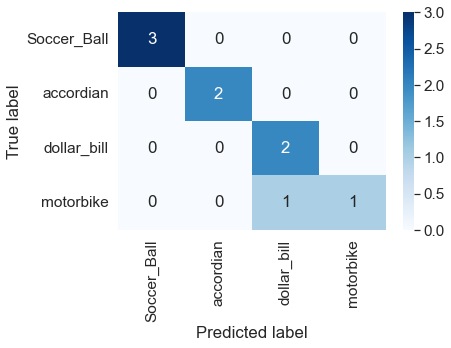

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

label_names = sorted(list(set(output)))
# generate confusion matrix
cm = confusion_matrix(output, y_pred)

# plot confusion matrix
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues',
            xticklabels=label_names, yticklabels=label_names)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()
